<a href="https://colab.research.google.com/github/sanskriti111-j/ML-Algorithms/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Principle Component Analysis

out of various columns which choose only those columns whose impact on our result is maximum. For this we choose that column in which variance is maximum . this is because variance shows the spread of data.

Principal Component Analysis (PCA) is a dimensionality reduction technique used in machine learning and statistics. It transforms a dataset with potentially many correlated variables into a smaller set of uncorrelated variables called principal components. These components are ordered by the amount of variance they explain in the original data, allowing for the selection of the most important components while discarding less significant ones.

Core Idea:
PCA aims to find the directions (principal components) in the data that capture the most variance.
By projecting data onto these principal components, it reduces the dimensionality of the data while preserving the most important information.
High variance indicates more information, while low variance suggests redundancy or noise

How it works:
1. Data Standardization:
The data is often standardized (centered and scaled) to ensure all variables contribute equally to the analysis.
2. Covariance Matrix:
A covariance matrix is calculated to understand the relationships between variables.
3. Eigenvalues and Eigenvectors:
The eigenvalues and eigenvectors of the covariance matrix are computed. Eigenvectors represent the principal components, and eigenvalues indicate the amount of variance explained by each component.
4. Dimensionality Reduction:
The eigenvectors corresponding to the largest eigenvalues are selected as the principal components. The number of components to keep depends on the desired level of dimensionality reduction and the amount of variance that needs to be retained.
5. Transformation:
The original data is projected onto the selected principal components, resulting in a lower-dimensional representation

Why PCA uses variance:
It’s easier for the computer to work with
In PCA, we use something called a covariance matrix, which is based on variance. Using variance directly keeps the math simple and clean.

We care about finding directions with the biggest spread
PCA wants to find directions (called principal components) where the data is most spread out — and that’s exactly what variance measures.

Variance adds up nicely
If you look at multiple directions, the total variance is just the sum of variances in each direction. That makes it easier to track how much information we’re keeping.

Eigenvalues = Variance in PCA
When PCA calculates eigenvalues (which tell us how important each direction is), they actually represent variance — not standard deviation.



covariance tell us about how our axis  changes with each other

Eigenvector: A direction in your data that doesn’t change during a transformation (e.g., rotation, scaling).

Eigenvalue: A number that tells you how important or strong that direction is — i.e., how much the data varies in that direction.



n PCA (Principal Component Analysis)
We try to find the most important directions in which the data spreads.

PCA calculates the eigenvectors of the covariance matrix of the data.

The eigenvector with the largest eigenvalue is the direction where the data varies the most.

👉 PCA keeps the top eigenvectors (principal components) with the largest eigenvalues. These explain the most about the data.

2. Dimensionality Reduction
Suppose you have 100 features, but only 2-3 directions (eigenvectors) capture 95% of the variance (eigenvalues).

You can project your data onto these few directions and throw away the rest — less data, same insight.



Absolutely! Here's a concise and well-structured **revision note** on **Eigen Decomposition of the Covariance Matrix**, perfect for **quick review**:

---

# 📘 **Eigen Decomposition of Covariance Matrix – Revision Notes**

---

## ✅ **What is Covariance Matrix?**

* Captures relationships between features in a dataset.
* Square matrix with:

  * **Diagonal** = Variance of each feature
  * **Off-diagonal** = Covariance between features

**Formula (for mean-centered data):**

$$
\Sigma = \frac{1}{n} X^\top X
$$

---

## ✅ **What is Eigen Decomposition?**

* A way to **break down** a matrix into:

  $$
  \Sigma = V \Lambda V^{-1}
  $$

  or (for symmetric matrices like covariance):

  $$
  \Sigma = V \Lambda V^\top
  $$

Where:

* **V** = Matrix of eigenvectors (principal directions)
* **Λ** = Diagonal matrix of eigenvalues (variance in those directions)

---

## ✅ **Why in PCA?**

* PCA wants to find **directions of maximum variance** in the data.
* These directions are **eigenvectors**.
* The **amount of variance** along each direction = **eigenvalue**.

---

## 🧠 **PCA Step-by-Step using Eigen Decomposition:**

1. **Standardize** the data (zero mean, unit variance)
2. Compute **covariance matrix** (Σ)
3. Do **eigen decomposition**:

   $$
   \Sigma = V \Lambda V^\top
   $$
4. **Sort** eigenvectors by eigenvalues (largest to smallest)
5. **Select top-k** eigenvectors → principal components
6. **Project data** onto these components for dimensionality reduction

---

## 🧾 **Key Concepts Recap:**

| Term                | Meaning                                   |
| ------------------- | ----------------------------------------- |
| Covariance Matrix   | Measures how features vary together       |
| Eigenvector         | A special direction in feature space      |
| Eigenvalue          | Importance (variance) of that direction   |
| PCA                 | Uses top eigenvectors to represent data   |
| Eigen Decomposition | Breaks matrix into directions + strengths |

---

## 🧩 **Analogy:**

> Like shining a flashlight on a 3D object.
> **Eigenvectors** = Best directions to shine from
> **Eigenvalues** = How much of the object’s detail you’ll see in that direction

---

Let me know if you'd like a PDF version of these notes or a Python code example to match this theory!


the largest eigenveector always points out into the direction of largest variance of data

the eigenvector whose eigen value is maximum becomes principle component 1

Seps of pca:
1 mean centring 2. covariance matrix
3. find eigenvector and eigen values

In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('/content/ai_dev_productivity.csv')

In [4]:
df.head()

,hours_coding,coffee_intake_mg,distractions,sleep_hours,commits,bugs_reported,ai_usage_hours,cognitive_load,task_success
0,5.99,600,1,5.8,2,1,0.71,5.4,1
1,4.72,568,2,6.9,5,3,1.75,4.7,1
2,6.30,560,1,8.9,2,0,2.27,2.2,1
3,8.05,600,7,6.3,9,5,1.40,5.9,0
4,4.53,421,6,6.9,4,0,1.26,6.3,1


In [7]:
x = df.drop('task_success', axis=1)
y=df['task_success']

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [11]:
x_train.shape

(400, 8)

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
knn=KNeighborsClassifier()

In [16]:
y_pred=knn.fit(x_train,y_train).predict(x_test)

In [17]:
accuracy_score(y_test,y_pred)

NameError: name 'accuracy_score' is not defined

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.92

# PCA

In [19]:
from sklearn.decomposition import PCA
pca=PCA(n_components=3)

In [20]:
x_train_trf=pca.fit_transform(x_train)
x_test_trf=pca.transform(x_test)

In [21]:
x_train_trf.shape

(400, 3)

In [22]:
knn=KNeighborsClassifier()

In [23]:
knn.fit(x_train_trf,y_train)

KNeighborsClassifier()

In [24]:
y_pred=knn.predict(x_test_trf)

In [25]:
accuracy_score(y_test,y_pred)

0.91

Here we can observe that initially we had 8 parametersa and accuracy of 92 percent but now we only used 3 parameters and obtained 91 percent accuracy

In [28]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

for i in range(1,9):
  pca=PCA(n_components=i)
  x_train_trf=pca.fit_transform(x_train)
  x_test_trf=pca.transform(x_test)
  knn=KNeighborsClassifier() # Instantiate the KNeighborsClassifier
  knn.fit(x_train_trf,y_train)
  y_pred=knn.predict(x_test_trf)
  print(f"accuracy for {i} is {accuracy_score(y_test,y_pred)}")

accuracy for 1 is 0.89
accuracy for 2 is 0.9
accuracy for 3 is 0.91
accuracy for 4 is 0.9
accuracy for 5 is 0.91
accuracy for 6 is 0.91
accuracy for 7 is 0.91
accuracy for 8 is 0.92


In [30]:
import plotly.express as px
import pandas as pd
from sklearn.decomposition import PCA

# Assuming x_train is your original training data
# Assuming y_train is the corresponding target variable

# Perform PCA with 3 components specifically for plotting
pca_plot = PCA(n_components=3)
x_train_trf_plot = pca_plot.fit_transform(x_train)


# Create a DataFrame for easier plotting with Plotly Express
df_pca = pd.DataFrame(x_train_trf_plot, columns=['PC1', 'PC2', 'PC3'])
df_pca['target'] = y_train.values # Add the target variable

fig = px.scatter_3d(df_pca, x='PC1', y='PC2', z='PC3', color='target',
                    title='3D PCA of Training Data',
                    labels={'PC1': 'Principal Component 1', 'PC2': 'Principal Component 2', 'PC3': 'Principal Component 3', 'target': 'Task Success'})
fig.show()

In [31]:
pca.explained_variance_

array([2.04366175e+04, 5.83216054e+00, 5.00934473e+00, 2.75663022e+00,
       1.13342669e+00, 9.78587379e-01, 4.69992975e-01, 3.97088271e-01])

In [32]:
pca.explained_variance_ratio_

array([9.99189504e-01, 2.85146679e-04, 2.44917471e-04, 1.34777489e-04,
       5.54156311e-05, 4.78452091e-05, 2.29789518e-05, 1.94144864e-05])

In [33]:
pca.feature_names_in_

array(['hours_coding', 'coffee_intake_mg', 'distractions', 'sleep_hours',
       'commits', 'bugs_reported', 'ai_usage_hours', 'cognitive_load'],
      dtype=object)

In [34]:
pca.get_feature_names_out

<bound method ClassNamePrefixFeaturesOutMixin.get_feature_names_out of PCA(n_components=8)>

Finding Optimum number of principle components required

Text(0, 0.5, 'explained variance')

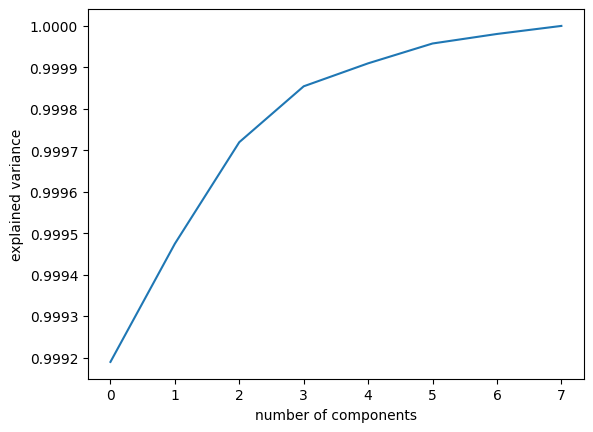

In [37]:
import matplotlib.pyplot as plt
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('explained variance')

PCA not used when:
1. data is circular along all axes so even if we rotate the axis variance will be same
2. Data is following a specific trend that will be hidden while taking projections
3. data is divides in some parts opposite to axis their projection will interfere.